# Drug Classification - Decision Tree and Random Forest

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import Dataset

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df = df.rename(columns=lambda x: x.lower().strip().replace("na_to_k", "Na/K"))

In [5]:
df['drug'].value_counts(), df['bp'].value_counts(), df['cholesterol'].value_counts()

(drug
 drugY    91
 drugX    54
 drugA    23
 drugC    16
 drugB    16
 Name: count, dtype: int64,
 bp
 HIGH      77
 LOW       64
 NORMAL    59
 Name: count, dtype: int64,
 cholesterol
 HIGH      103
 NORMAL     97
 Name: count, dtype: int64)

## Visualization of distribution and relations

<Axes: xlabel='drug', ylabel='count'>

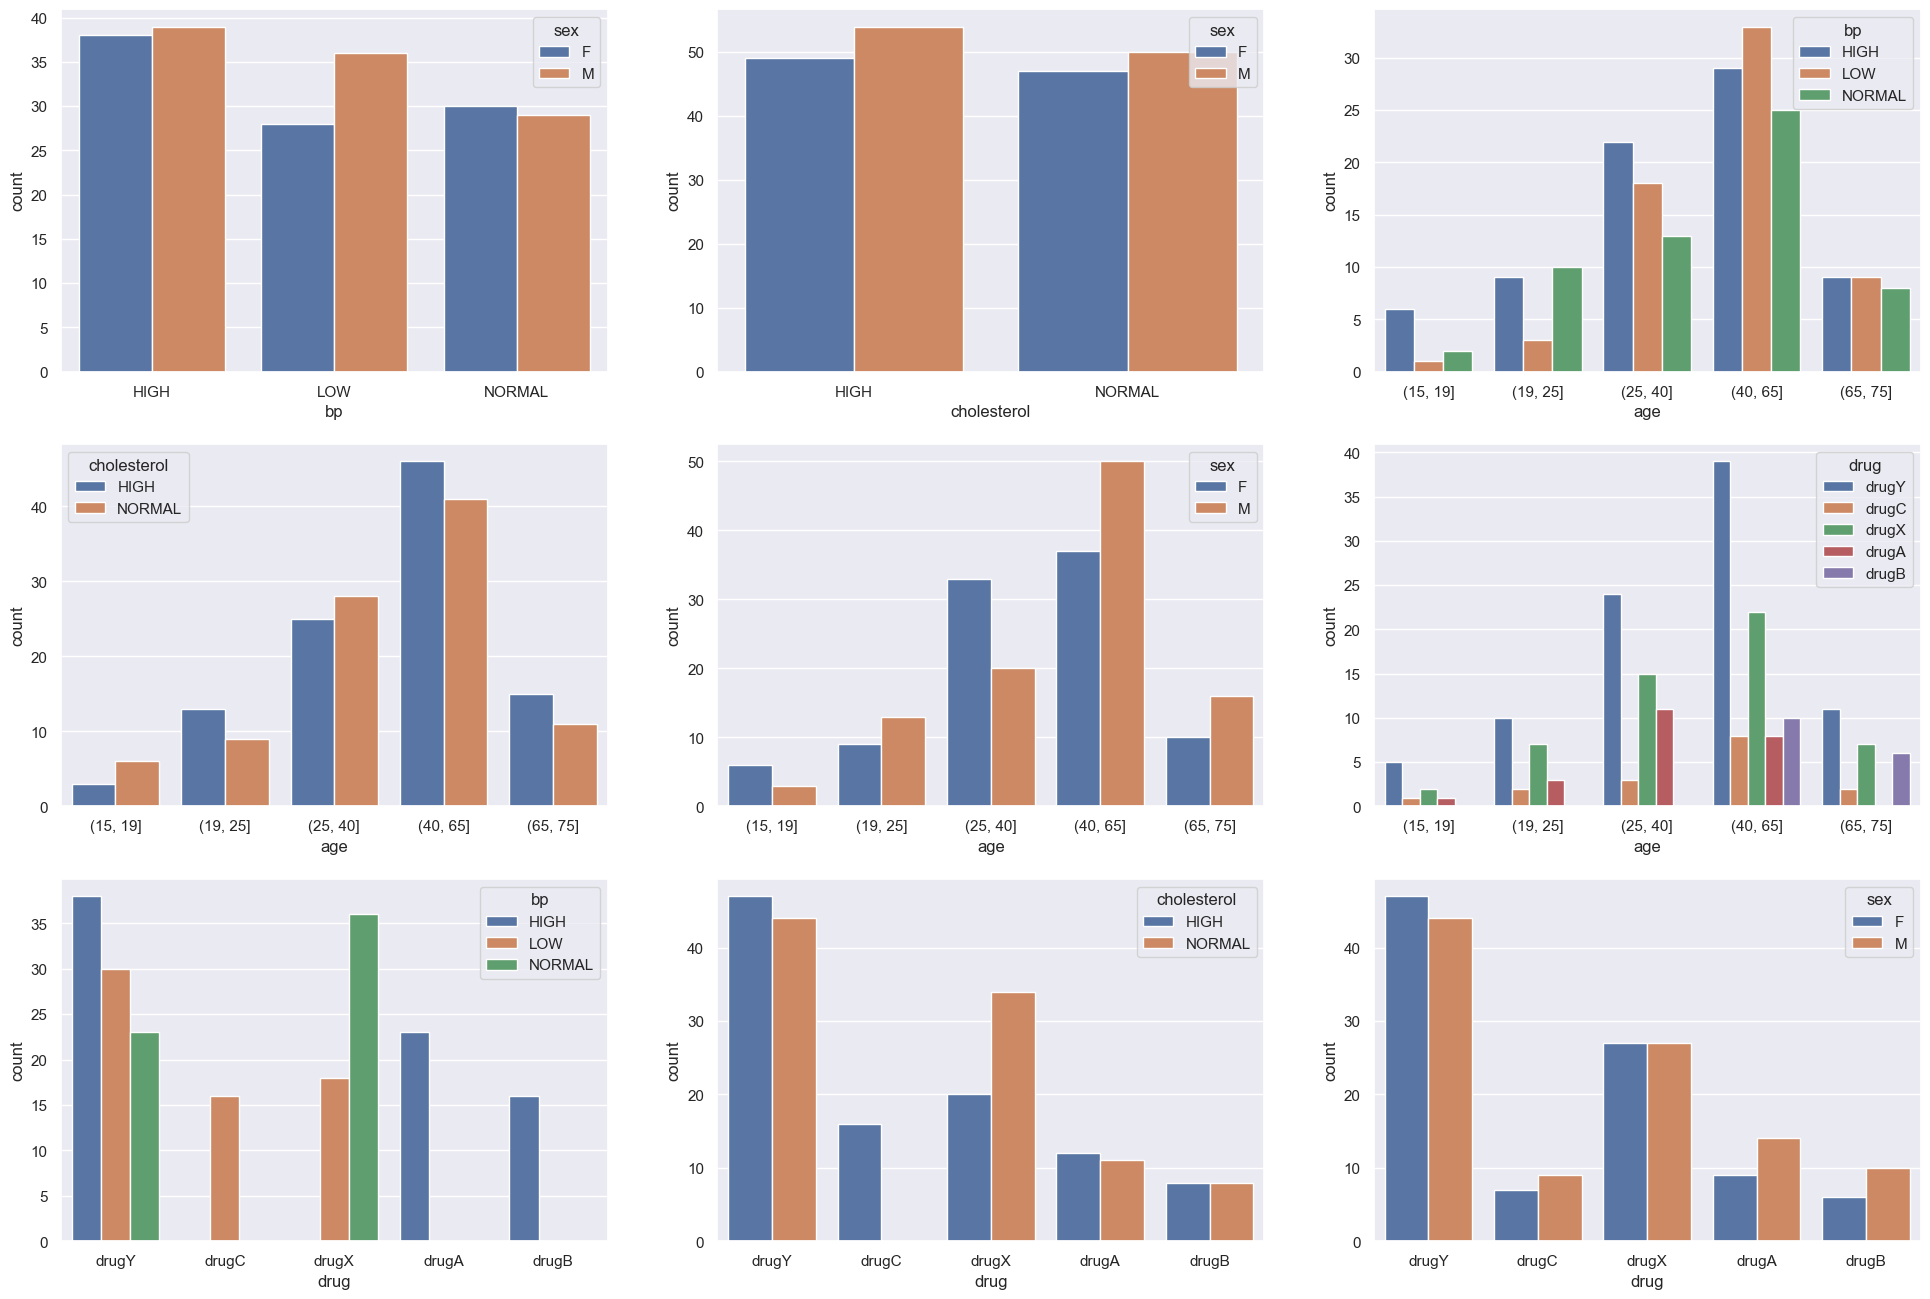

In [6]:
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 16))
sns.countplot(data=df, x='bp', hue='sex', ax=axes[0][0])
sns.countplot(data=df, x='cholesterol', hue='sex', ax=axes[0][1])
sns.countplot(data=df, x=pd.cut(df['age'], [15, 19, 25, 40, 65, 75]), hue='bp', ax=axes[0][2])
sns.countplot(data=df, x=pd.cut(df['age'], [15, 19, 25, 40, 65, 75]), hue='cholesterol', ax=axes[1][0])
sns.countplot(data=df, x=pd.cut(df['age'], [15, 19, 25, 40, 65, 75]), hue='sex', ax=axes[1][1])
sns.countplot(data=df, x=pd.cut(df['age'], [15, 19, 25, 40, 65, 75]), hue='drug', ax=axes[1][2])
sns.countplot(data=df, x='drug', hue='bp', ax=axes[2][0])
sns.countplot(data=df, x='drug', hue='cholesterol', ax=axes[2][1])
sns.countplot(data=df, x='drug', hue='sex', ax=axes[2][2])

<Axes: xlabel='age', ylabel='Density'>

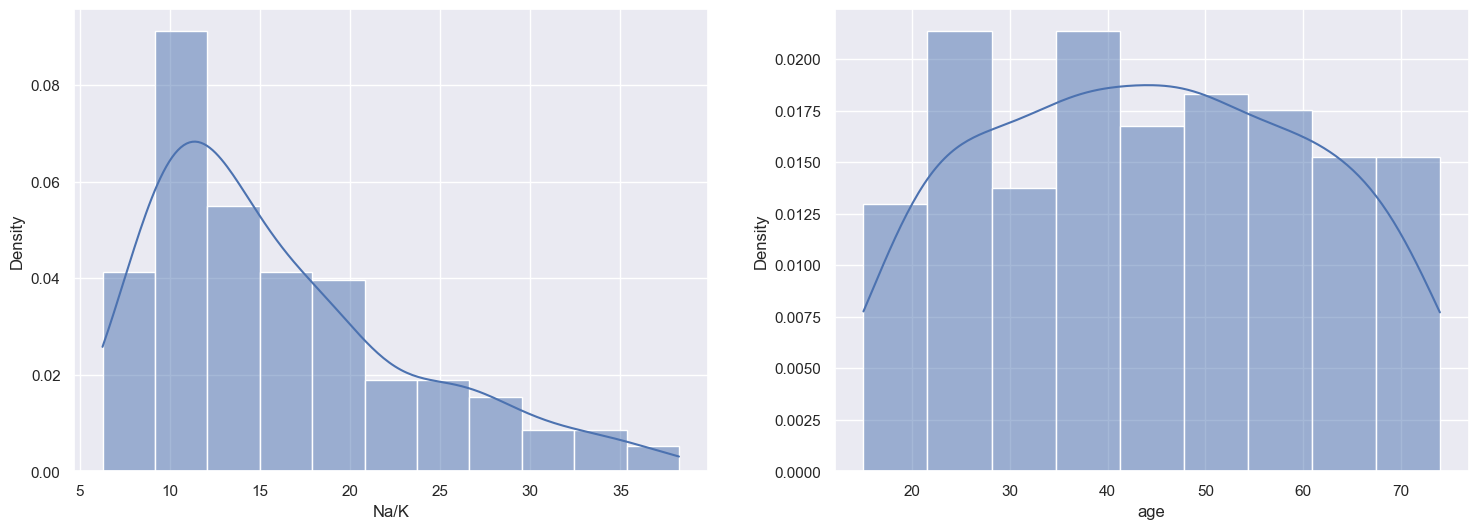

In [7]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.histplot(df['Na/K'], kde=True, stat="density", ax=axes[0])
sns.histplot(df['age'], kde=True, stat="density", ax=axes[1])

## Data Preparation

In [8]:
le = LabelEncoder()
df['drug'] = le.fit_transform(df['drug'])
df['sex'] = df['sex'].map({"F": 0, "M": 1}).astype(np.int32)
df['cholesterol'] = df['cholesterol'].map({"NORMAL": 2, "HIGH": 5}).astype(np.int32)
df['bp'] = df['bp'].map({"LOW": 0, "NORMAL": 2, "HIGH": 5}).astype(np.int32)

In [9]:
df.head()

,age,sex,bp,cholesterol,Na/K,drug
0,23,0,5,5,25.355,4
1,47,1,0,5,13.093,2
2,47,1,0,5,10.114,2
3,28,0,2,5,7.798,3
4,61,0,0,5,18.043,4


In [10]:
X = df.loc[:, "age":"Na/K"].values
y = df['drug'].values

In [11]:
print(f"Feature array shape:{X.shape}")
print(f"Target array size: {y.size}")

Feature array shape:(200, 5)
Target array size: 200


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 123,
                                                    stratify = y,
                                                    shuffle = True)
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train labels shape: {y_train.size}")
print(f"Test labels shape: {y_test.size}")

Train features shape: (160, 5)
Test features shape: (40, 5)
Train labels shape: 160
Test labels shape: 40


In [13]:
scaler = StandardScaler()
X_train[:, [0, 4]] = scaler.fit_transform(X_train[:, [0, 4]])
X_test[:, [0, 4]] = scaler.transform(X_test[:, [0, 4]])

## Modeling

In [14]:
model_dt = DecisionTreeClassifier(random_state=123)
model_rf = RandomForestClassifier(random_state=123)

In [15]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("\nLaporan Klasifikasi - Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_dt))


Laporan Klasifikasi - Decision Tree:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Balanced Accuracy: 1.0


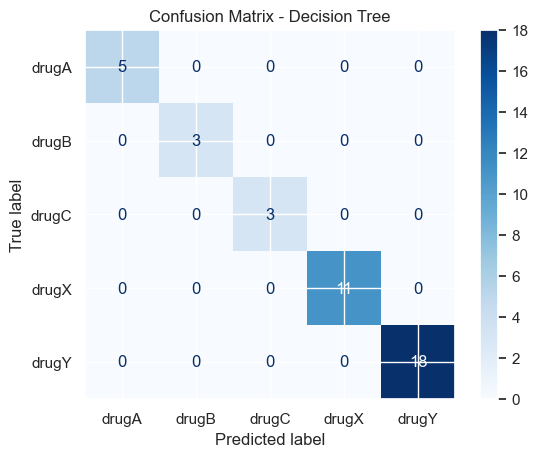

In [16]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=le.classes_)
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [17]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\nLaporan Klasifikasi - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))


Laporan Klasifikasi - Random Forest:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Balanced Accuracy: 1.0


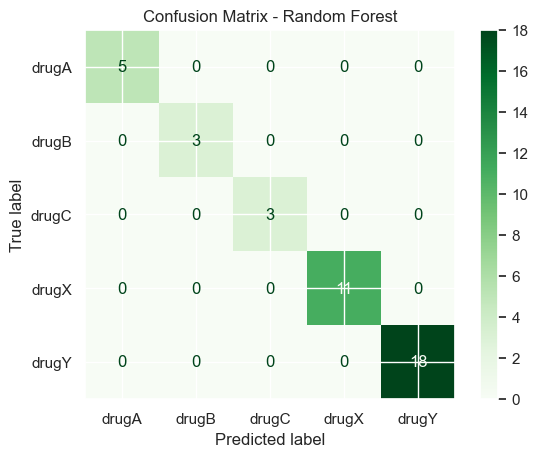

In [18]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
dt_scores = cross_val_score(model_dt, X_train, y_train, cv=cv, scoring='balanced_accuracy')
rf_scores = cross_val_score(model_rf, X_train, y_train, cv=cv, scoring='balanced_accuracy')

print("\nEvaluasi Cross-Validation:")
print(f"Decision Tree | Rata-rata: {dt_scores.mean():.4f} +/- {dt_scores.std():.4f}")
print(f"Random Forest | Rata-rata: {rf_scores.mean():.4f} +/- {rf_scores.std():.4f}")


Evaluasi Cross-Validation:
Decision Tree | Rata-rata: 0.9956 +/- 0.0089
Random Forest | Rata-rata: 0.9822 +/- 0.0259


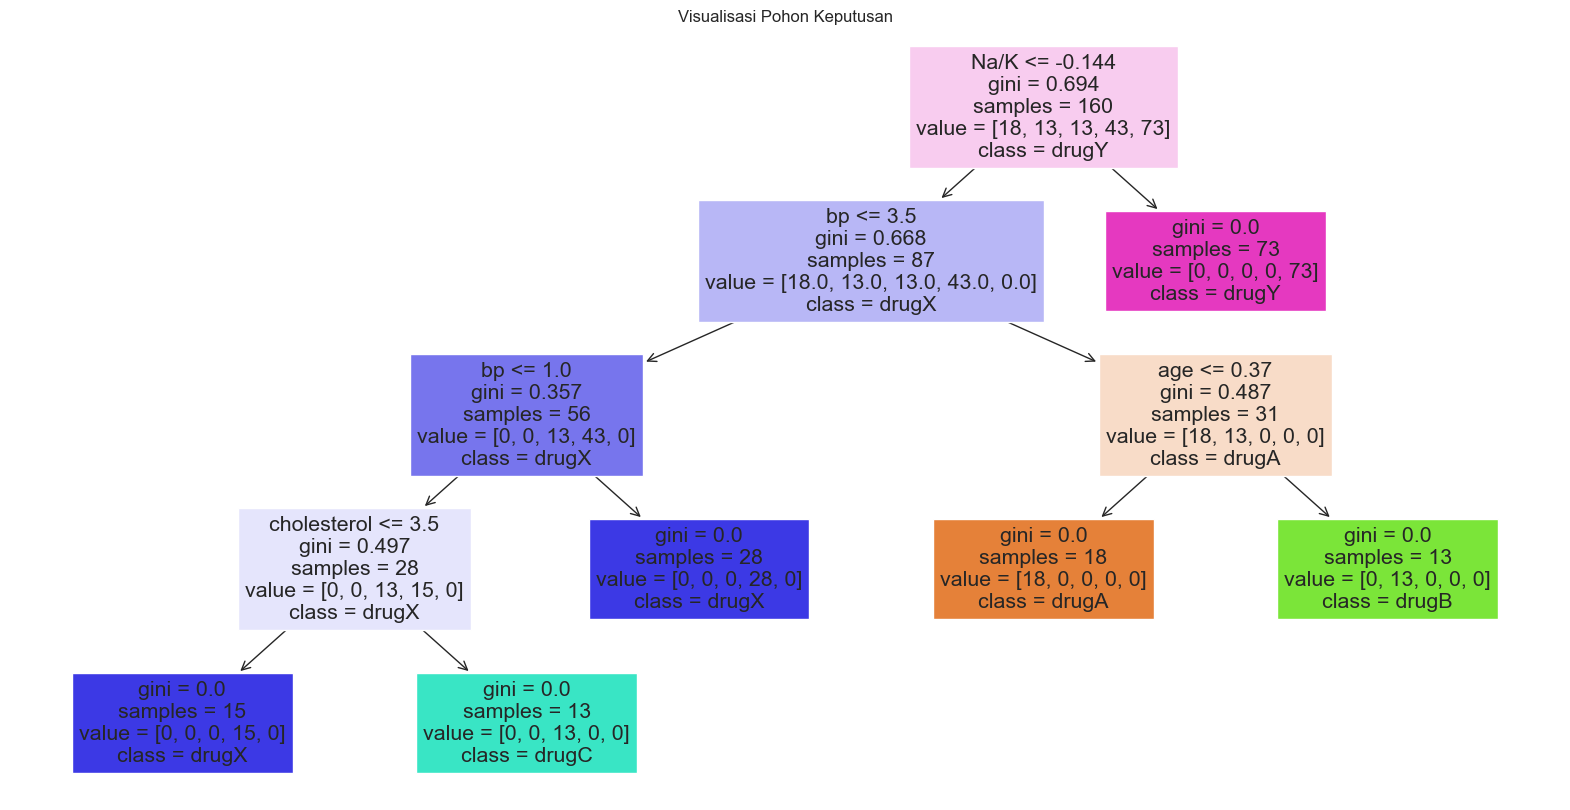

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(model_dt, feature_names=df.columns[0:5], class_names=le.classes_, filled=True)
plt.title("Visualisasi Pohon Keputusan")
plt.show()